# <font color='red'> <center> French Soccer </font>

# Introduction

Notre jeu de données contient l’ensemble des matchs du championnat de France de football 2007-2008. Composé de 20 équipes s’affrontant chacune lors de rencontres allers et retours, le tableau de données contient les résultats de 380 matches.

# Description Statistique

In [1]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Importer les données 
df = pd.read_csv('footdata.csv',sep=",")
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,04/08/07,Bordeaux,Lens,1,0,H,1,0,H,13,...,19,4,4,3,2,0,1,2.20,2.87,3.6
1,04/08/07,Caen,Nice,1,0,H,0,0,D,16,...,15,2,3,1,1,0,0,2.40,2.75,3.0
2,04/08/07,Lille,Lorient,0,0,D,0,0,D,6,...,19,2,2,1,1,0,0,1.72,3.00,5.0
3,04/08/07,Monaco,St Etienne,1,1,D,1,0,H,16,...,3,5,6,3,3,0,0,1.90,2.90,4.0
4,04/08/07,Paris SG,Sochaux,0,0,D,0,0,D,11,...,17,5,9,2,1,0,0,1.72,3.40,5.0


In [3]:
df.shape

(380, 24)

La base de données a une taille de 380 et une dimension de 24.

In [4]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.347368,0.936842,0.573684,0.434211,14.113158,11.026316,4.834211,3.581579,16.926316,17.955263,5.402632,4.178947,1.468421,1.805263,0.073684,0.113158,2.236974,3.179526,4.153026
std,1.180478,1.027953,0.742485,0.668467,4.368916,4.032106,2.113255,2.031721,4.708925,5.049162,2.535967,2.343706,1.100037,1.225918,0.281050,0.348893,0.730307,0.370348,1.757391
min,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,2.500000,1.500000
25%,0.000000,0.000000,0.000000,0.000000,11.000000,8.000000,3.750000,2.000000,14.000000,14.000000,4.000000,2.750000,1.000000,1.000000,0.000000,0.000000,1.800000,3.000000,3.200000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,3.000000,17.000000,18.000000,5.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.100000,3.100000,3.750000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,14.000000,6.000000,5.000000,20.000000,21.000000,7.000000,5.000000,2.000000,3.000000,0.000000,0.000000,2.400000,3.250000,4.750000
max,6.000000,6.000000,3.000000,3.000000,29.000000,26.000000,11.000000,11.000000,32.000000,33.000000,14.000000,14.000000,6.000000,5.000000,2.000000,2.000000,7.500000,6.500000,15.000000


In [5]:
df.dtypes

Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG          int64
HTAG          int64
HTR          object
HS            int64
AS            int64
HST           int64
AST           int64
HF            int64
AF            int64
HC            int64
AC            int64
HY            int64
AY            int64
HR            int64
AR            int64
B365H       float64
B365D       float64
B365A       float64
dtype: object

Les deux colonnes FTR et HTR contiennent des valeures catégoriques, on essaie par la suite de les rendre en numériques 

In [6]:
# Créer un dictionnaire de mapping pour les valeurs dans les colonnes 'FTR' et 'HTR'
mapping = {'H': 1, 'D': 0, 'A': -1}

# Utiliser la méthode .map() pour appliquer le mapping  et remplacer les valeurs
df['FTR'] = df['FTR'].map(mapping)
df['HTR'] = df['HTR'].map(mapping)



In [7]:
# Gestion des données manquantes
missing_values = df.isna().sum()
print(missing_values)

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
B365H       0
B365D       0
B365A       0
dtype: int64


On remarque qu'il n y a aucune données manquantes 

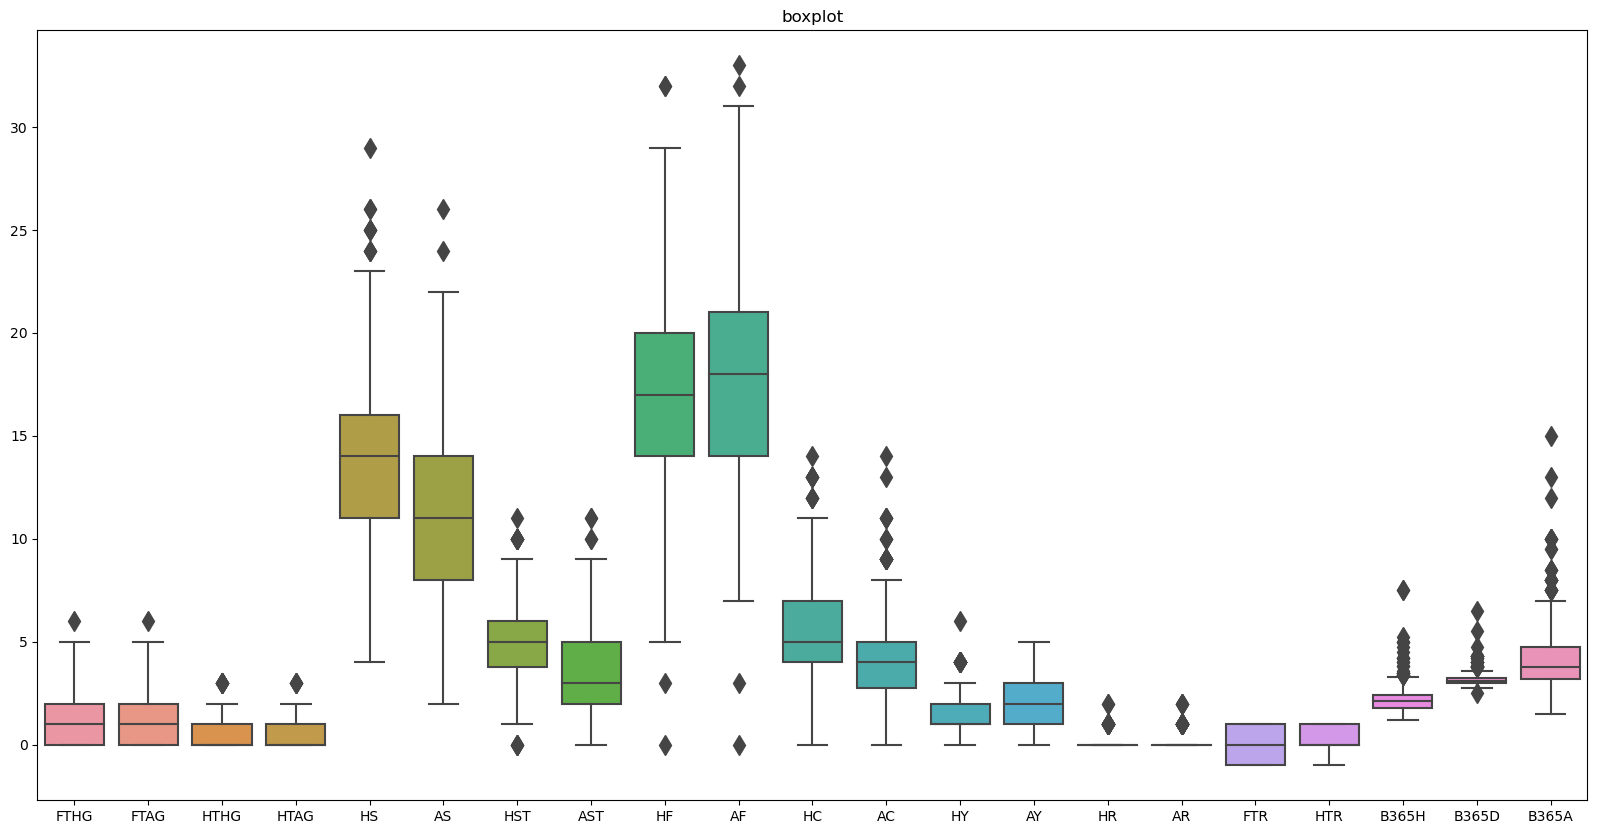

In [8]:
# Identification des données outliers 
plt.figure(figsize=(20, 10))
columns = ["FTHG", "FTAG", "HTHG", "HTAG", "HS", "AS", "HST", "AST", "HF", "AF", "HC", "AC", "HY", "AY", "HR", "AR", "FTR", "HTR", "B365H", "B365D", "B365A"]
plt.title('boxplot')
data_box =sns.boxplot(data=df[columns],fliersize=10)   
plt.show()

In [9]:
# Exemple des données outliers pour la colonne B365A
Q1 = df['HS'].quantile(0.25)
Q3 = df['HS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df['HS'] < lower_bound) | (df['HS'] > upper_bound)
outlier_values = df['HS'][outliers]
print(outlier_values)

55     24
75     25
97     25
133    26
175    26
184    24
232    25
291    25
292    29
368    24
Name: HS, dtype: int64


On remarque que les outliers sont des valeurs réelles donc on a décidé de les garder 

# Exploration de données 

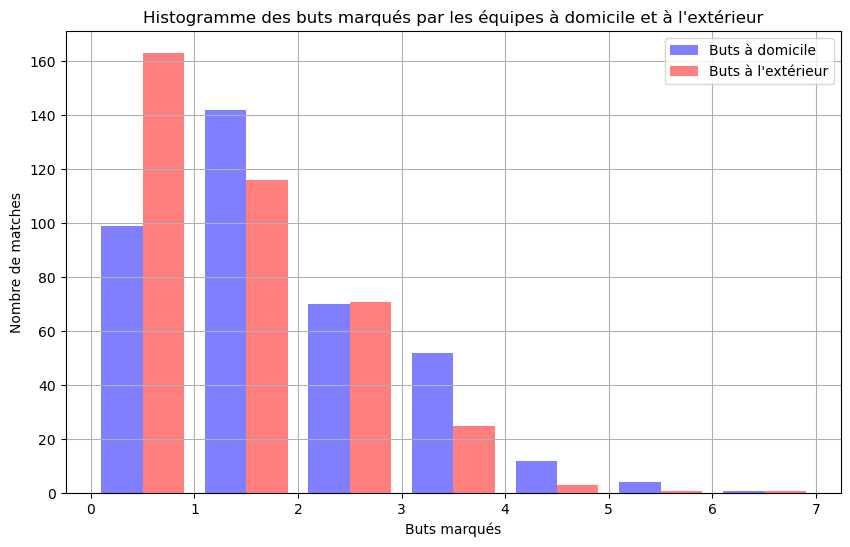

In [10]:
plt.figure(figsize=(10, 6))
# Créer un histogramme avec deux ensembles de données (df["FTHG"] et df["FTAG"])
# Définir les bacs pour l'histogramme de 0 à la valeur maximale trouvée dans les deux ensembles de données + 1

plt.hist([df["FTHG"], df["FTAG"]], bins=range(0, max(max(df["FTHG"]), max(df["FTAG"])) + 2), alpha=0.5, color=['blue', 'red'], label=['Buts à domicile', 'Buts à l\'extérieur'])
plt.xlabel('Buts marqués')
plt.ylabel('Nombre de matches')
plt.title('Histogramme des buts marqués par les équipes à domicile et à l\'extérieur')
plt.legend()
plt.grid(True)
plt.show()

Pour la plupart des matches, les équipes à domicile marquent plus de buts que les équipes à l'extérieur.

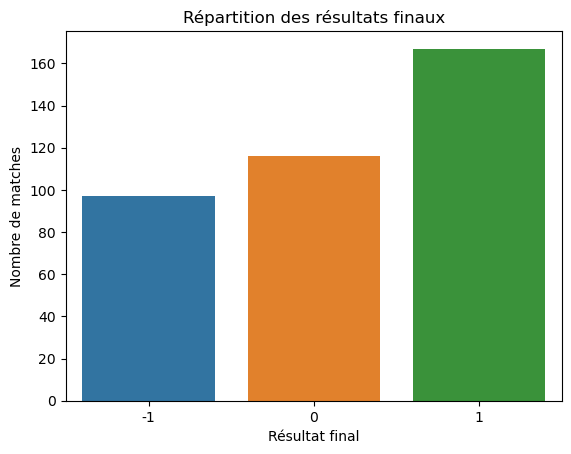

In [11]:
# Créer un graphique de comptage (countplot) en utilisant Seaborn
sns.countplot(x='FTR',data=df)
plt.xlabel('Résultat final')
plt.ylabel('Nombre de matches')
plt.title('Répartition des résultats finaux')
plt.show()
 


On remarque qu'il y a plus de victoires à domicile que de matchs nuls ou de victoires à l'extérieur 
Le nombre de match nul est significatif ce qui peut indiquer des performances équilibrées entre des equipes 

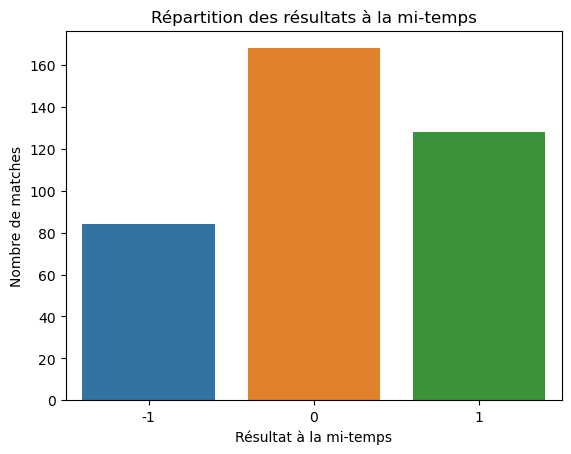

In [12]:
# Créer un graphique de comptage (countplot) en utilisant Seaborn
sns.countplot(x='HTR',data=df)
plt.xlabel('Résultat à la mi-temps')
plt.ylabel('Nombre de matches')
plt.title('Répartition des résultats à la mi-temps')
plt.show()


La majorité des mi-temps finissent par égalité
La plupart des équipes à domicile qui gagnent à la mi-temps finissent également par gagner à la fin du match

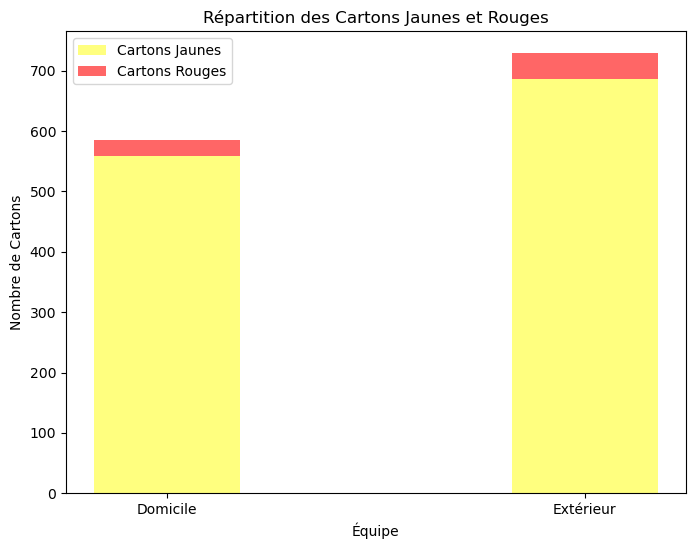

In [13]:
# Calcul du nombre total de cartons jaunes pour l'équipe à domicile et à l'extérieur
jaune_domicile = df['HY'].sum()
rouge_domicile = df['HR'].sum()

# Calculez le nombre total de cartons rouges pour l'équipe à domicile et à l'extérieur
jaune_extérieur = df['AY'].sum()
rouge_extérieur = df['AR'].sum()

plt.figure(figsize=(8, 6))
width = 0.35
ind = [1, 2]

plt.bar(ind, [jaune_domicile, jaune_extérieur], width, label='Cartons Jaunes', color='yellow', alpha=0.5)
plt.bar(ind, [rouge_domicile, rouge_extérieur], width, bottom=[jaune_domicile, jaune_extérieur], label='Cartons Rouges', color='red', alpha=0.6)

plt.xlabel('Équipe')
plt.ylabel('Nombre de Cartons')
plt.title('Répartition des Cartons Jaunes et Rouges')
plt.xticks(ind, ['Domicile', 'Extérieur'])

plt.legend()

plt.show()



les équipes à l'extérieur commettent un plus grand nombre de fautes et reçoivent plus de cartons jaunes et rouges par rapport aux équipes à domicile.


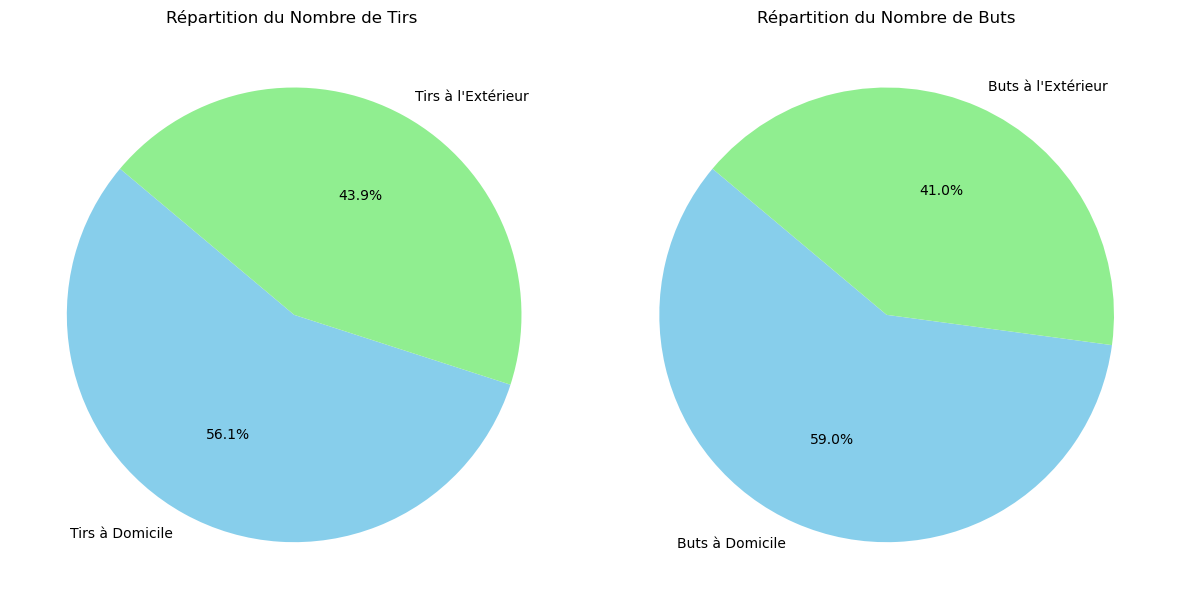

In [14]:
# Calculer le nombre total de tirs à domicile et à l'extérieur
tirs_domicile = df['HS'].sum()
tirs_extérieur = df['AS'].sum()

# Calculer le nombre total de buts à domicile et à l'extérieur
buts_domicile = df['FTHG'].sum()
buts_extérieur = df['FTAG'].sum()

labels_tirs = ['Tirs à Domicile', 'Tirs à l\'Extérieur']
labels_buts = ['Buts à Domicile', 'Buts à l\'Extérieur']

# Créer une liste des tailles des sections pour le graphique circulaire des tirs et des buts
sizes_tirs = [tirs_domicile, tirs_extérieur]
sizes_buts = [buts_domicile, buts_extérieur]

colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(sizes_tirs, labels=labels_tirs, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Répartition du Nombre de Tirs ')

plt.subplot(1, 2, 2)
plt.pie(sizes_buts, labels=labels_buts, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Répartition du Nombre de Buts')

plt.tight_layout()

plt.show()


Les équipes qui jouent à domicile réalisent plus de tirs et marquent plus de buts.

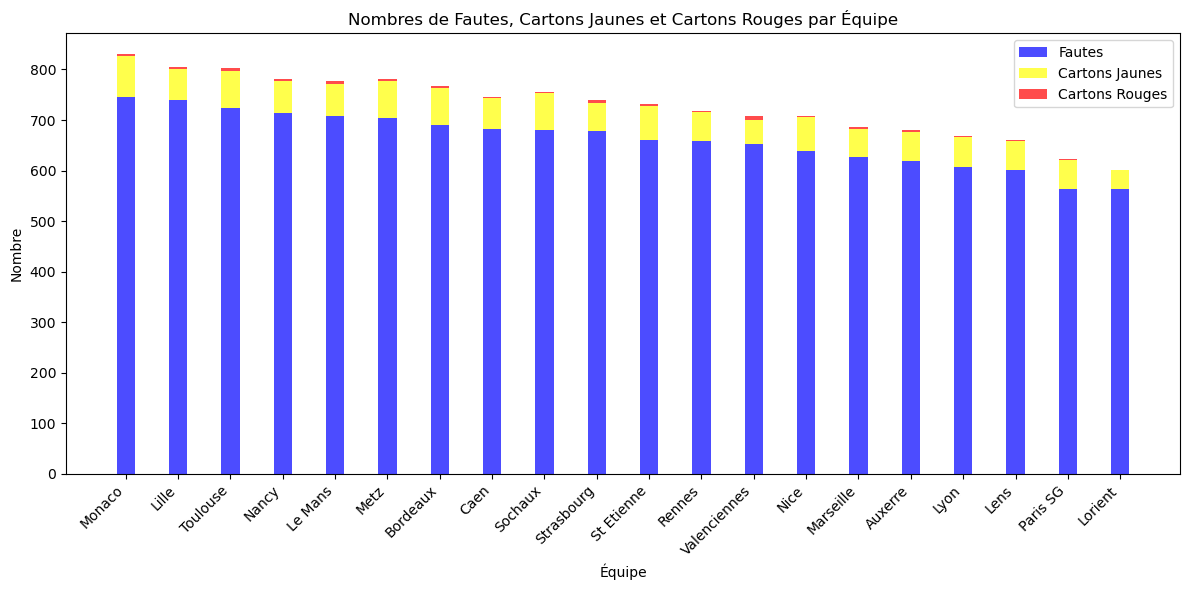

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Calculer le nombre total de fautes à domicile et à l'extérieur pour chaque équipe
fautes_domicile = df.groupby('HomeTeam')['HF'].sum()
fautes_exterieur = df.groupby('AwayTeam')['AF'].sum()

# Calculer le nombre total de cartons jaunes à domicile et à l'extérieur pour chaque équipe
cartons_jaunes_domicile = df.groupby('HomeTeam')['HY'].sum()
cartons_jaunes_exterieur = df.groupby('AwayTeam')['AY'].sum()

# Calculez le nombre total de cartons rouges à domicile et à l'extérieur pour chaque équipe
cartons_rouges_domicile = df.groupby('HomeTeam')['HR'].sum()
cartons_rouges_exterieur = df.groupby('AwayTeam')['AR'].sum()

# Calculer le total des fautes, cartons jaunes et cartons rouges pour chaque équipe
total_fautes = fautes_domicile + fautes_exterieur
total_cartons_jaunes = cartons_jaunes_domicile + cartons_jaunes_exterieur
total_cartons_rouges = cartons_rouges_domicile + cartons_rouges_exterieur


equipes = total_fautes.sort_values(ascending=False).index


bar_width = 0.35

bar_position = np.arange(len(equipes))

plt.figure(figsize=(12, 6))

plt.bar(bar_position, total_fautes[equipes], bar_width, label='Fautes', color='blue', alpha=0.7)

plt.bar(bar_position, total_cartons_jaunes[equipes], bar_width, label='Cartons Jaunes', color='yellow', alpha=0.7, bottom=total_fautes[equipes])

plt.bar(bar_position, total_cartons_rouges[equipes], bar_width, label='Cartons Rouges', color='red', alpha=0.7, bottom=total_fautes[equipes]+total_cartons_jaunes[equipes])

plt.xlabel('Équipe')
plt.ylabel('Nombre')
plt.title('Nombres de Fautes, Cartons Jaunes et Cartons Rouges par Équipe')
plt.xticks(bar_position, equipes, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


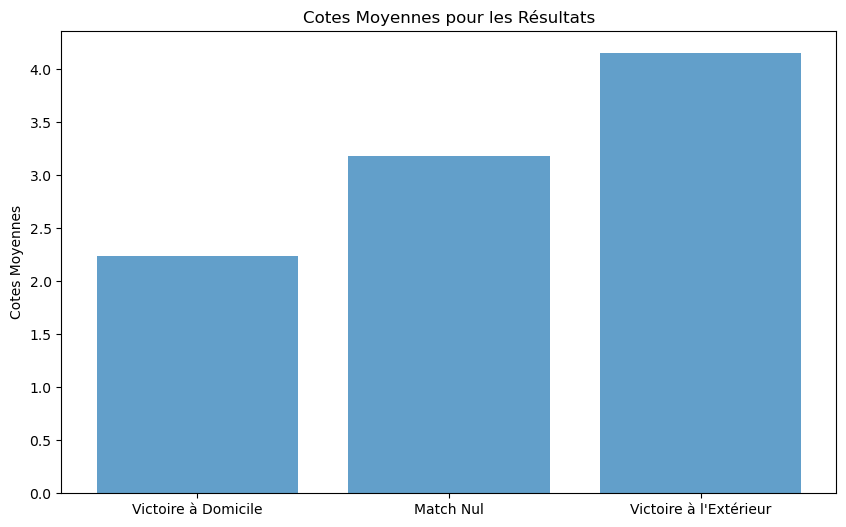

In [16]:
# Sélectionnezr les colonnes de cotes pour les résultats
cotes_domicile = df['B365H']
cotes_match_nul = df['B365D']
cotes_exterieur = df['B365A']

plt.figure(figsize=(10, 6))
plt.bar(['Victoire à Domicile', 'Match Nul', 'Victoire à l\'Extérieur'], [cotes_domicile.mean(), cotes_match_nul.mean(), cotes_exterieur.mean()], alpha=0.7)

plt.title('Cotes Moyennes pour les Résultats')
plt.ylabel('Cotes Moyennes')
plt.show()




les parieurs perçoivent que les équipes extérieur ont la la probabilité la plus faible pour gagner 

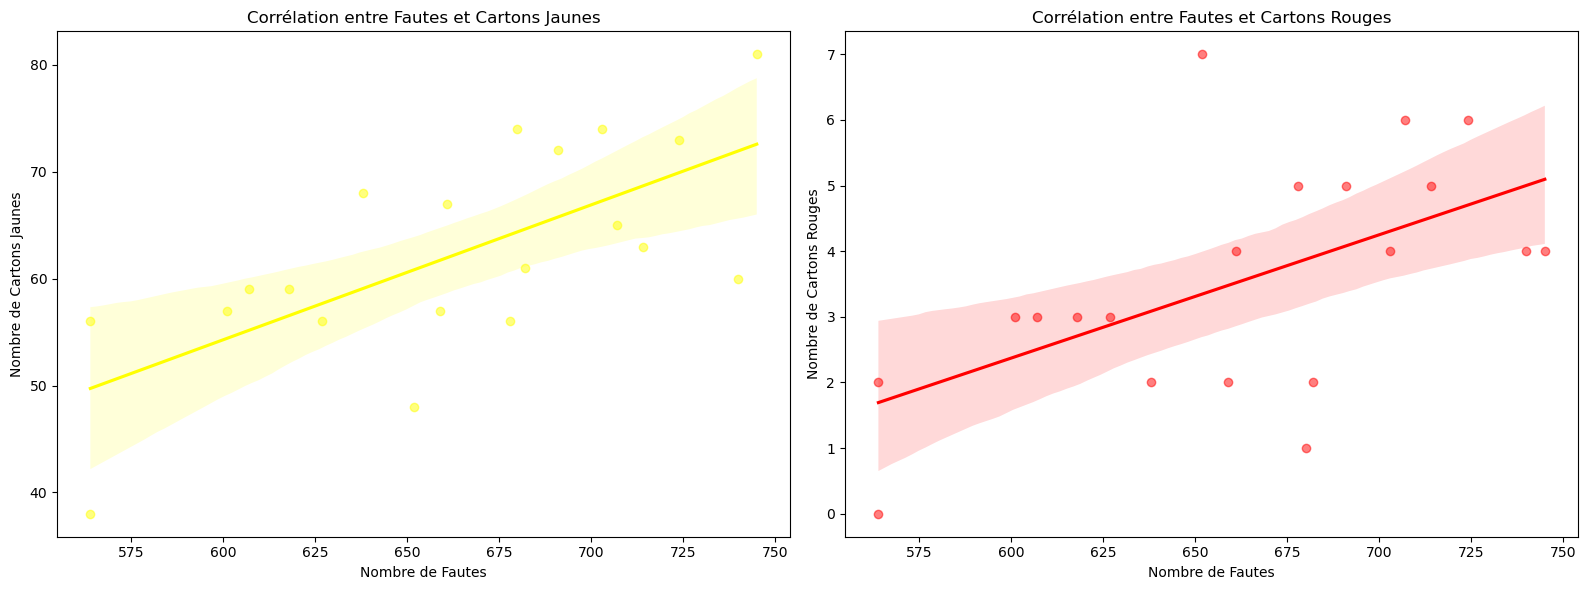

In [17]:
# Calcul du nombre total de fautes, de cartons jaunes et de cartons rouges 
fautes_domicile = df.groupby('HomeTeam')['HF'].sum()
fautes_exterieur = df.groupby('AwayTeam')['AF'].sum()
cartons_jaunes_domicile = df.groupby('HomeTeam')['HY'].sum()
cartons_jaunes_exterieur = df.groupby('AwayTeam')['AY'].sum()
cartons_rouges_domicile = df.groupby('HomeTeam')['HR'].sum()
cartons_rouges_exterieur = df.groupby('AwayTeam')['AR'].sum()

total_fautes = fautes_domicile + fautes_exterieur
total_cartons_jaunes = cartons_jaunes_domicile + cartons_jaunes_exterieur
total_cartons_rouges = cartons_rouges_domicile + cartons_rouges_exterieur


# Créer une nouvelle figure avec deux sous-graphiques côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Premier sous-graphique : Corrélation entre Fautes et Cartons Jaunes
sns.regplot(x=total_fautes, y=total_cartons_jaunes, scatter_kws={'alpha':0.5}, color='yellow', ax=ax1)
ax1.set_title('Corrélation entre Fautes et Cartons Jaunes')
ax1.set_xlabel('Nombre de Fautes')
ax1.set_ylabel('Nombre de Cartons Jaunes')

# Deuxième sous-graphique : Corrélation entre Fautes et Cartons Rouges
sns.regplot(x=total_fautes, y=total_cartons_rouges, scatter_kws={'alpha':0.5}, color='red', ax=ax2)
ax2.set_title('Corrélation entre Fautes et Cartons Rouges')
ax2.set_xlabel('Nombre de Fautes')
ax2.set_ylabel('Nombre de Cartons Rouges')

# Ajuster automatiquement la disposition des sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher les deux sous-graphiques côte à côte
plt.show()



D'apres les deux visualisations on conclut que lorsque le nombre de fautes augmente, le nombre de cartons jaunes et rouges augmente également

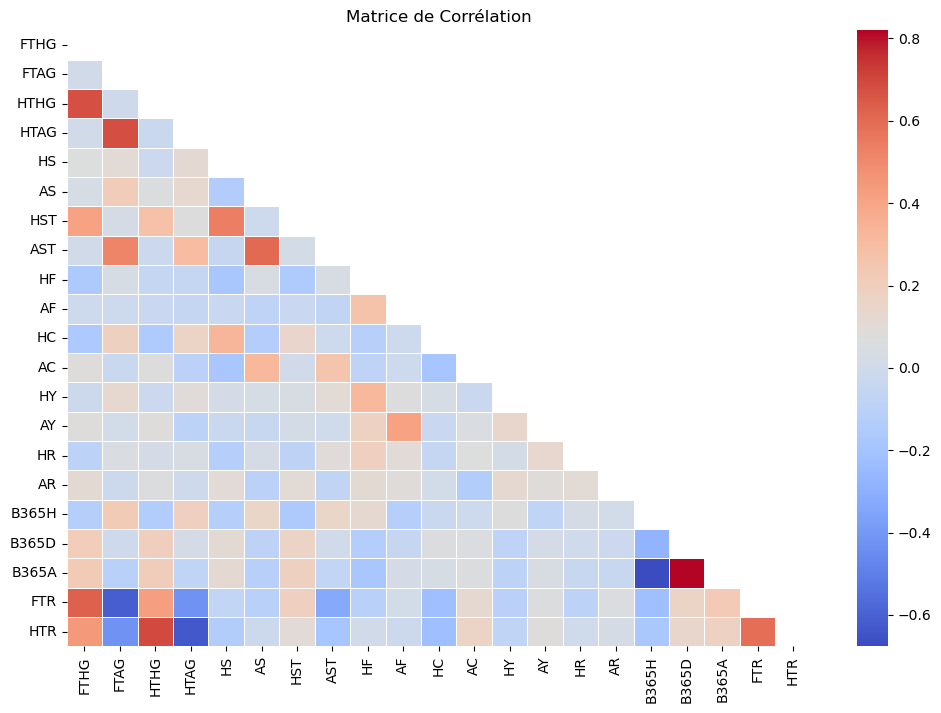

In [18]:
columns = ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS',
       'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR',
       'B365H', 'B365D', 'B365A', 'FTR', 'HTR']

# Créez un nouveau DataFrame contenant uniquement les colonnes sélectionnées (numériques)
correlation_df = df[columns]

correlation_matrix = correlation_df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()


D'apres la matrice de correlation, on remarque une forte corrélation positive entre les cotes de paris B365D (cotes pour un match null) et B365A (cotes de victoire de l'équipe à domicile). 
ce qui indique que les parieurs ajustent les cotes de sorte que lorsque la cote pour la victoire de l'équipe à domicile augmente, la cote pour un match nul augmente également, et vice versa.


# Analyse factorielle 

In [19]:
df.shape

(380, 24)

In [21]:
features = df[['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS',
       'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR',
       'B365H', 'B365D', 'B365A', 'FTR', 'HTR']]  

# Créer un objet StandardScaler pour standardiser les caractéristiques
scaler = StandardScaler()

# Appliquer la transformation de standardisation aux caractéristiques sélectionnées
scaled_features = scaler.fit_transform(features)

# scaled_features contient maintenant les caractéristiques mises à l'échelle

In [22]:
# Créer un objet ACP et ajustez-le aux caractéristiques mises à l'échelle
pca = PCA().fit(scaled_features)

# Obtenir les ratios de variance expliquée pour chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_


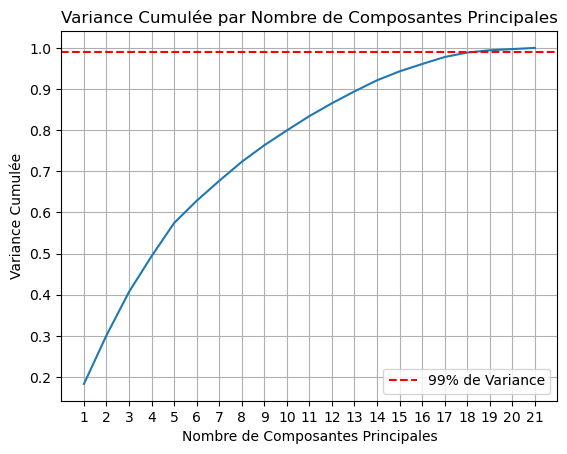

In [27]:
# Nombre de composantes principales
num_components = np.arange(1, len(pca.explained_variance_ratio_) + 1)

# Crée un graphique de la variance cumulée expliquée par le nombre de composantes principales
plt.plot(num_components, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Cumulée')
plt.title('Variance Cumulée par Nombre de Composantes Principales')


plt.axhline(y=0.99, color='r', linestyle='--', label='99% de Variance')
plt.legend()
plt.grid(True)

plt.xticks(num_components)

plt.show()

In [28]:
np.argmax(np.cumsum(pca.explained_variance_ratio_)>0.99)

18

In [30]:
# Projeter et tracer les données sur les deux premières composantes principales
x_pca = pca.transform(scaled_features)

# Déterminer le nombre de composantes principales après la transformation
num_components = x_pca.shape[1]


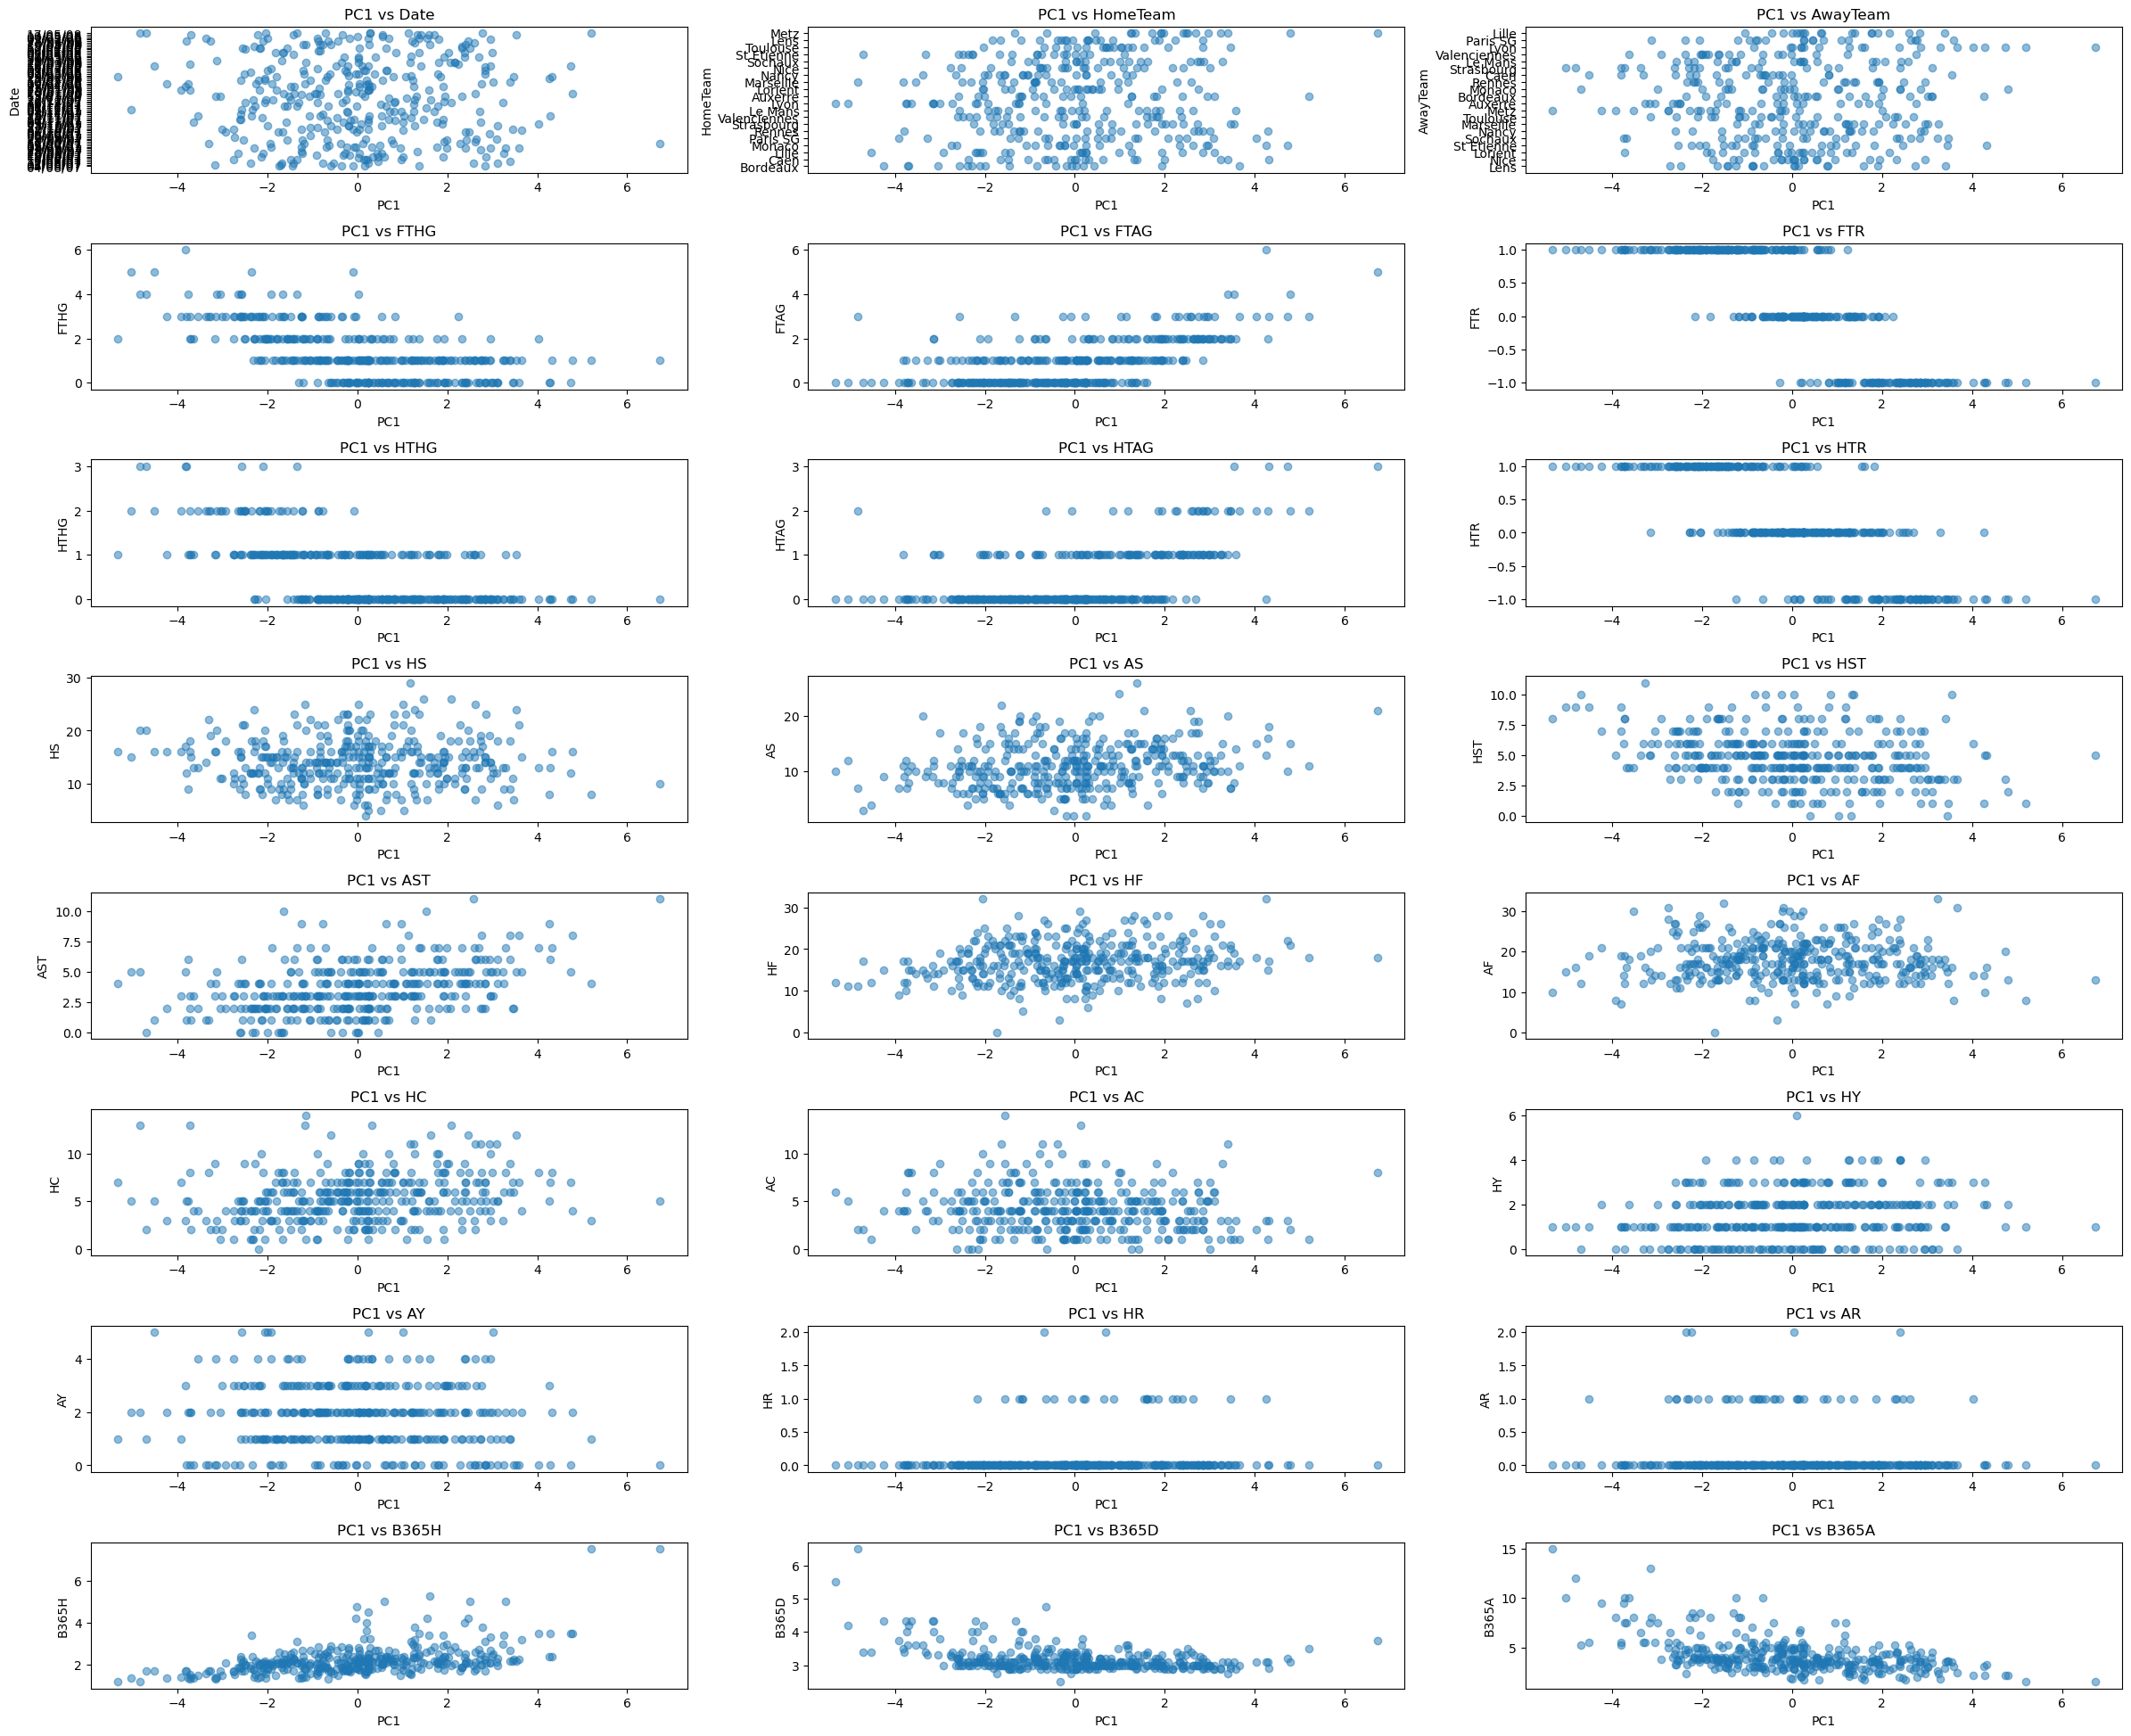

In [71]:

fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(24, 24))

for i, (ax, col) in enumerate(zip(axes.flatten(), df.columns)):
    ax.scatter(x_pca[:, 0], df[col], alpha=0.5)
    ax.set_title(f'PC1 vs {col}')
    ax.set_xlabel('PC1')
    ax.set_ylabel(col)
    
for i in range(len(df.columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


on remarque que la premiere composante est corrélée avec Le nombre de buts marqués par l'équipe à l'extérieur à la mi-temps et à la fin du match et aussi avec le nombre total de tirs de l'équipe à l'extérieur FTAH , HTAG et AS.

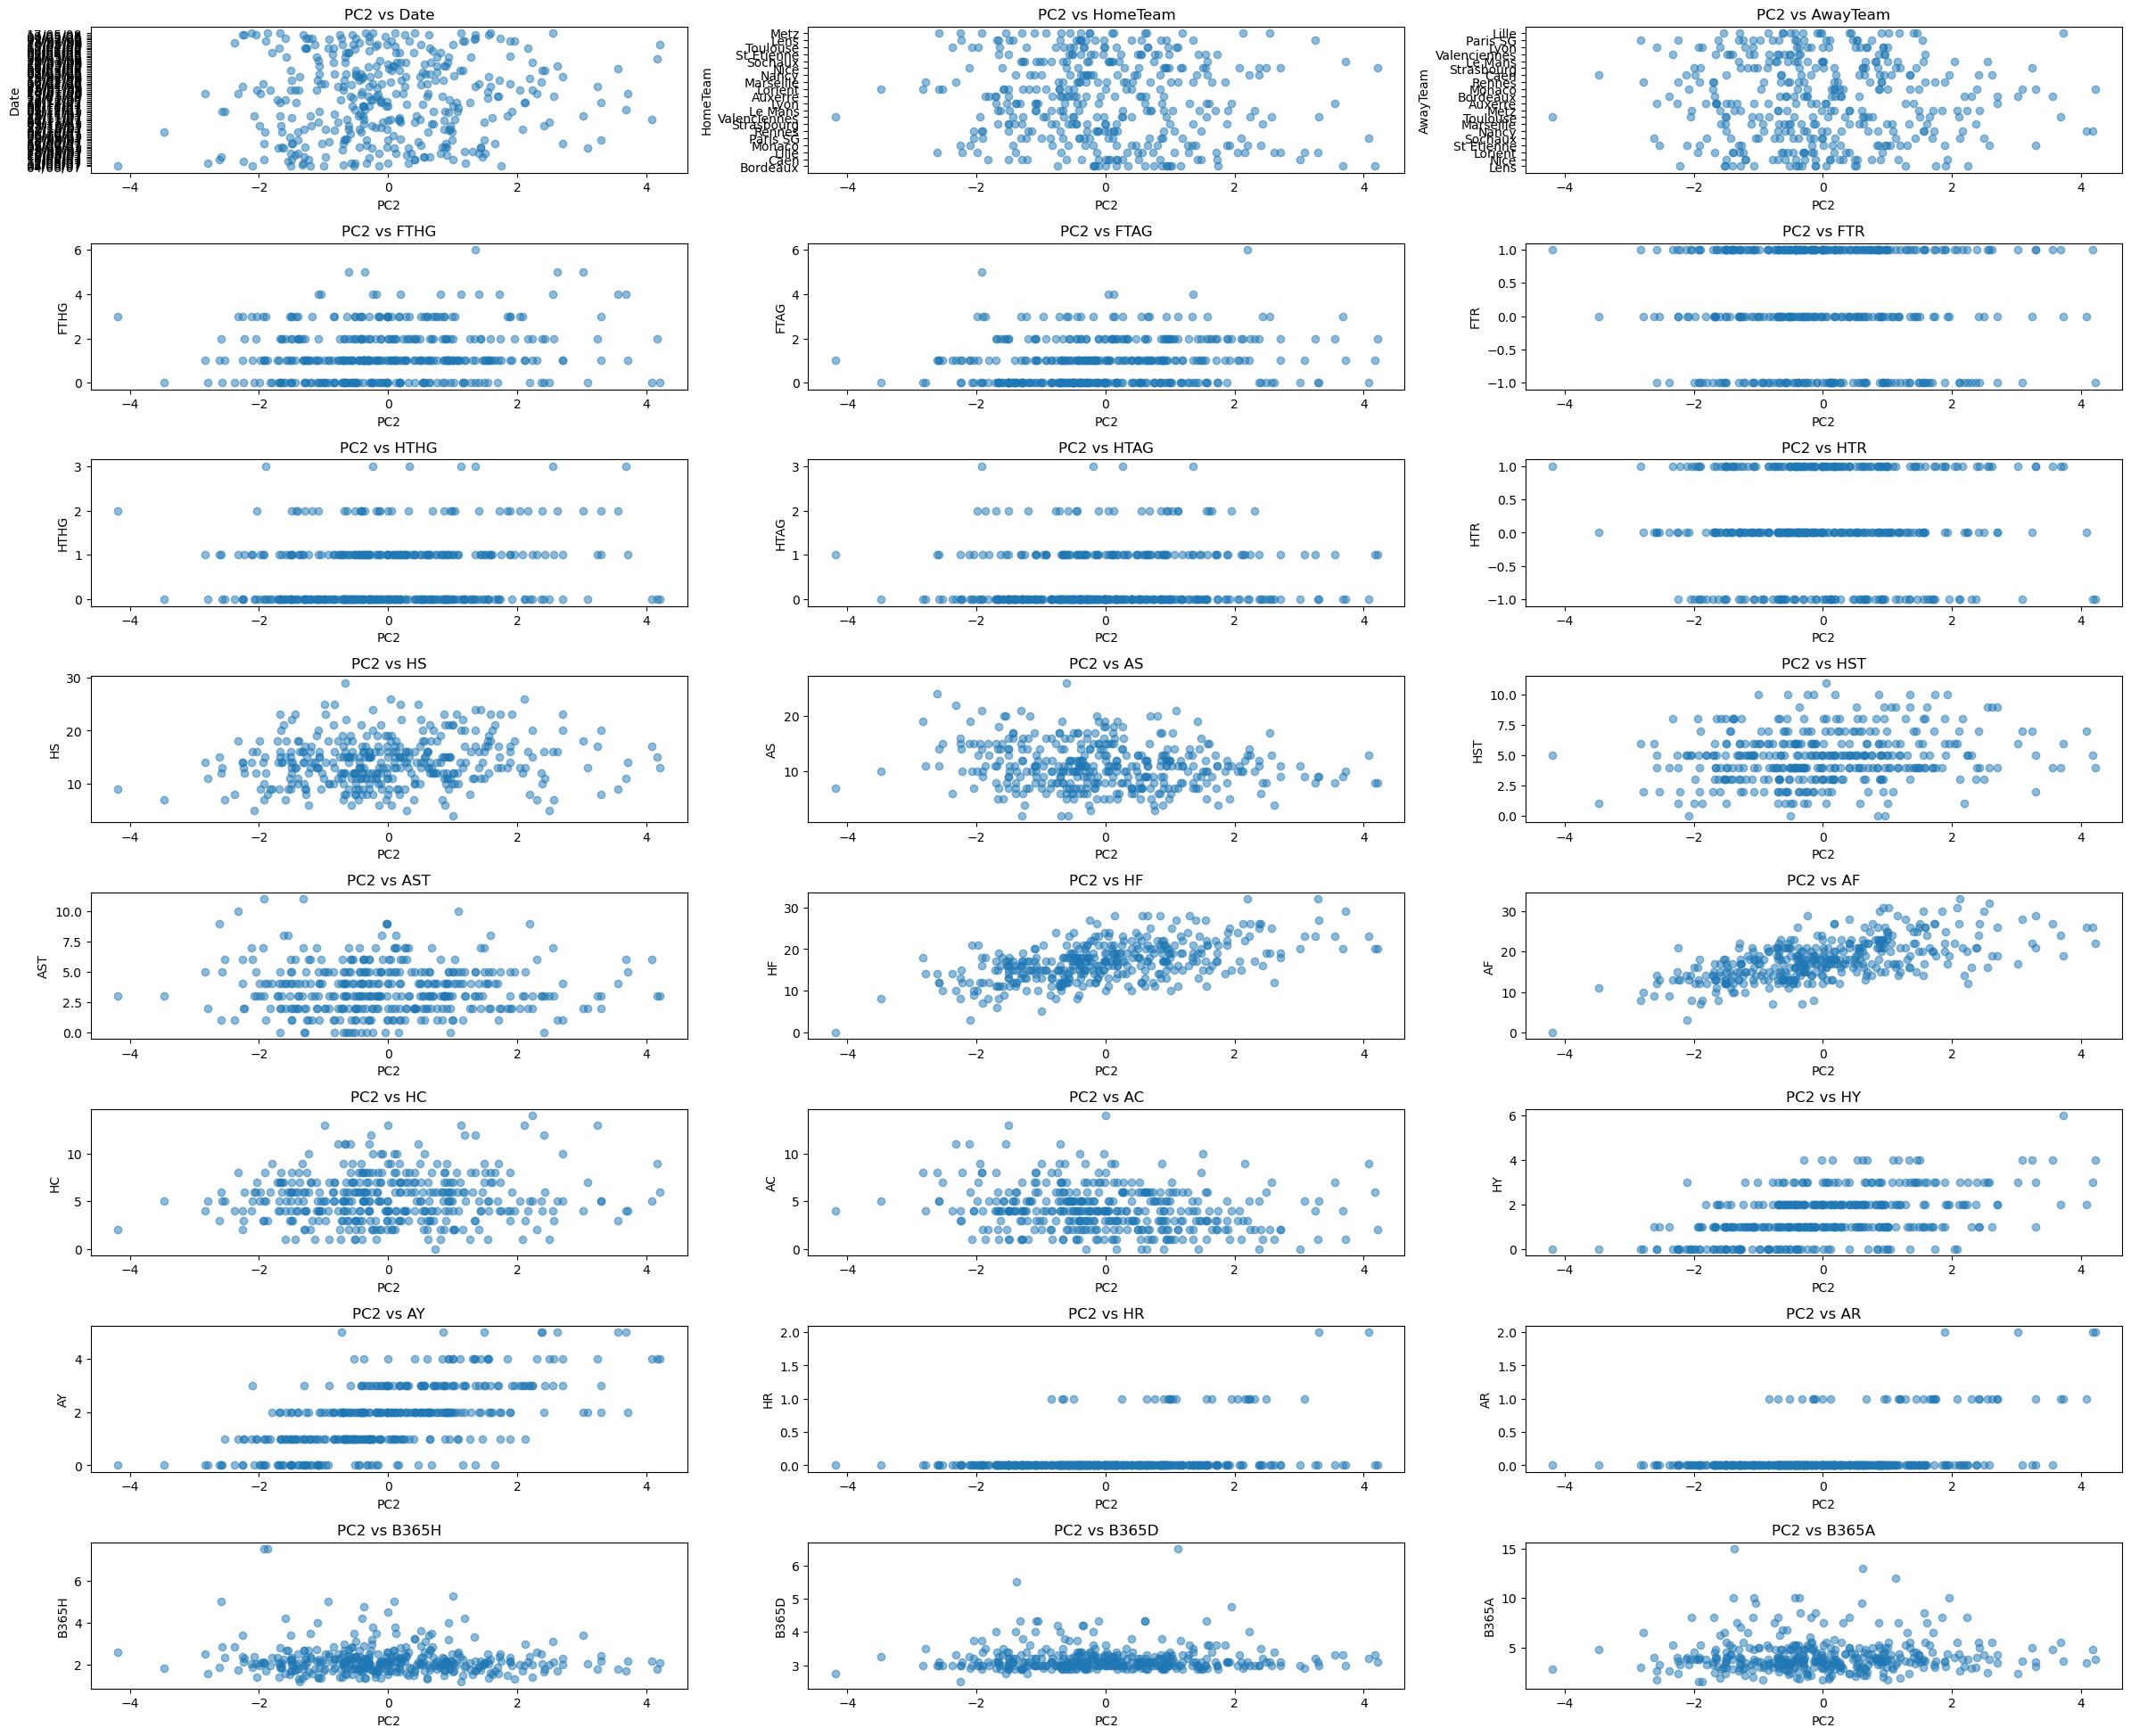

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(24, 24))

for i, (ax, col) in enumerate(zip(axes.flatten(), df.columns)):
    ax.scatter(x_pca[:, 3], df[col], alpha=0.5)
    ax.set_title(f'PC2 vs {col}')
    ax.set_xlabel('PC2')
    ax.set_ylabel(col)
    
for i in range(len(df.columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


la deuxieme composante est corrélée avec le nombre de cartons jaunes et le nombre de fautes reçus par l'équipe à domicile et l'equipe extérieur HY , AY, AF, HF.

(-5.0, 5.0)

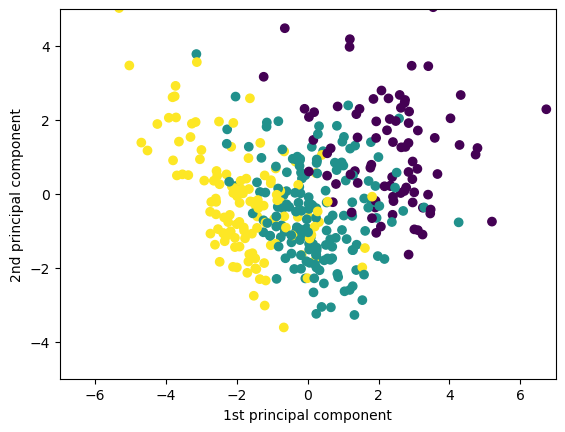

In [32]:
# Créer un scatter plot des données projetées sur les deux premières composantes principales
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['HTR'])
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.xlim(-7, 7)
plt.ylim(-5, 5)


Les deux premières composantes principales permettent de distinguer trois clusters : les victoires à domicile à droite, les matchs nuls au centre et les victoires à l'extérieur à gauche.

(-0.7, 0.7)

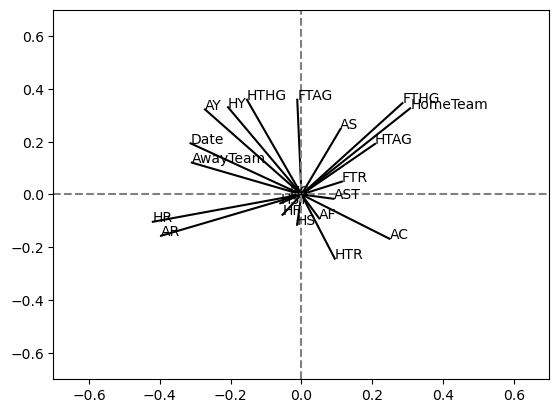

In [33]:
# Obtenir les composantes principales calculées par l'analyse ACP
components = pca.components_

# Parcourir les deux premières composantes principales et leurs valeurs
for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    # Tracer un vecteur depuis l'origine (0,0) vers les coordonnées (x, y) avec une ligne noire
    plt.plot([0, x], [0, y], color='k')
    
    # Ajouter une étiquette 
    plt.text(x, y, df.columns[i])

# Tracer des lignes en pointillés pour les axes x et y
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

# Limiter les échelles des axes x et y pour mieux visualiser les vecteurs des composantes principales
plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7)


# KMeans

Appliquation de KMEANS sans ACP

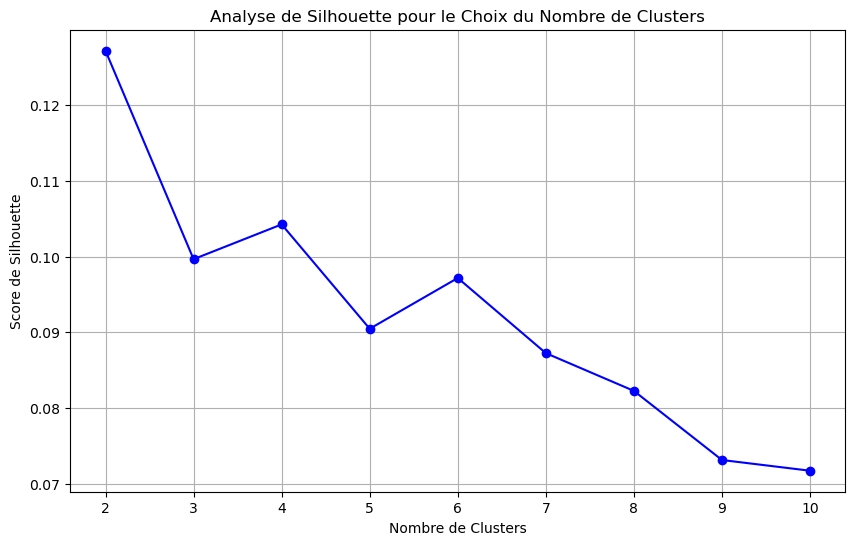

In [76]:

cluster_range = range(2, 11)  

silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)
    
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score de Silhouette')
plt.title('Analyse de Silhouette pour le Choix du Nombre de Clusters')
plt.grid(True)
plt.show()


In [77]:
kmeans = KMeans(n_clusters=2,n_init=10,init='k-means++').fit(scaled_features)
labels = kmeans.labels_
clusterCount = np.bincount(labels)
clusterCount

array([133, 247])

In [78]:
# Compute the silhouette index for each cluster number
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
CL=[]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=42,init='random').fit(scaled_features) # Clustering with the given number of clusters
    cluster_labels = clusterer.labels_ # Extract the labels
    CL.append(cluster_labels)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.12789711446086807
For n = 3 Silhouette_score: 0.10205946107345876
For n = 4 Silhouette_score: 0.09981181796078255
For n = 5 Silhouette_score: 0.10398699183813392
For n = 6 Silhouette_score: 0.09757432617224472
For n = 7 Silhouette_score: 0.10163786013004356
For n = 8 Silhouette_score: 0.08998989028668732
For n = 9 Silhouette_score: 0.07705192885011536
For n = 10 Silhouette_score: 0.08045434871545


L'indice de silhouette est presque égal à 0,13, ce qui est considéré comme faible, indiquant ainsi un certain chevauchement entre nos clusters.

In [ ]:
Application de Kmeans avec ACP

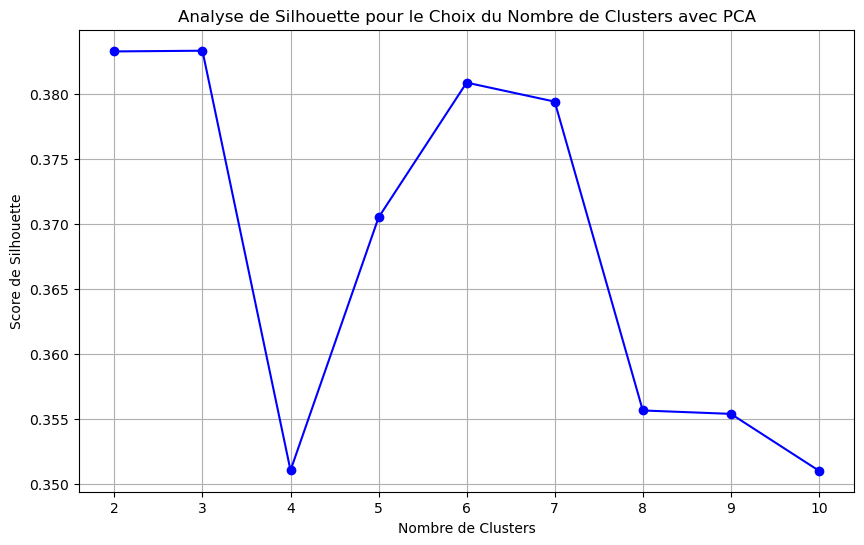

In [80]:
cluster_range = range(2, 11)

silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10)
    cluster_labels = kmeans.fit_predict(x_pca[:,:2])  
    
    silhouette_avg = silhouette_score(x_pca[:,:2], cluster_labels)  
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score de Silhouette')
plt.title('Analyse de Silhouette pour le Choix du Nombre de Clusters avec PCA')
plt.grid(True)
plt.show()


In [81]:
kmeans = KMeans(n_clusters=3,n_init=10,init='k-means++').fit(x_pca[:,:2])
labels = kmeans.labels_
clusterCount = np.bincount(labels)
clusterCount

array([123,  62, 195])

In [34]:
# Calcul des indices de silhouettes 
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
CL=[]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=42,init='random').fit(x_pca[:,:2]) 
    cluster_labels = clusterer.labels_ 
    CL.append(cluster_labels)
    silhouette_avg = silhouette_score(x_pca[:,:2], cluster_labels) 
   
    # Afficher les resultats 
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.3832478653830396
For n = 3 Silhouette_score: 0.3833018966553751
For n = 4 Silhouette_score: 0.35059140819926843
For n = 5 Silhouette_score: 0.3704785161355519
For n = 6 Silhouette_score: 0.38084857230673297
For n = 7 Silhouette_score: 0.37938571705963264
For n = 8 Silhouette_score: 0.35658983138453426
For n = 9 Silhouette_score: 0.35472851762683505
For n = 10 Silhouette_score: 0.3619569476374099


Lorsque nous avons appliqué le PCA avec projection des données sur les deux premières composantes principales, l'indice de silhouette est devenu de 0,38 pour 3 clusters, ce qui indique une meilleure séparation entre les clusters.

# Hierarchical clustering

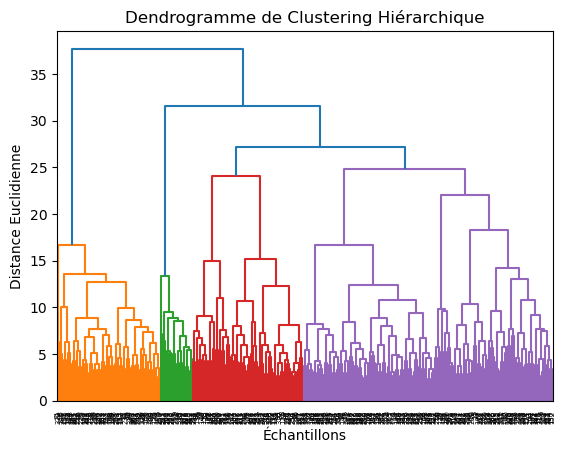

In [35]:

import scipy.cluster.hierarchy as sch

from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(scaled_features)

# Effectuer le clustering hiérarchique
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))

# Afficher le dendrogramme
plt.title("Dendrogramme de Clustering Hiérarchique")
plt.xlabel("Échantillons")
plt.ylabel("Distance Euclidienne")
plt.show()


Le dendrogramme montre la structure hiérarchique des clusters en fonction de la similitude entre les données des matchs, avec les regroupements les plus larges en haut (niveau supérieur) et les regroupements les plus spécifiques en bas (niveau inférieur).

En choisissant un niveau de découpe dans notre dendrogramme, nous pouvons déterminer le nombre de clusters que nous souhaitons extraire de nos données. 

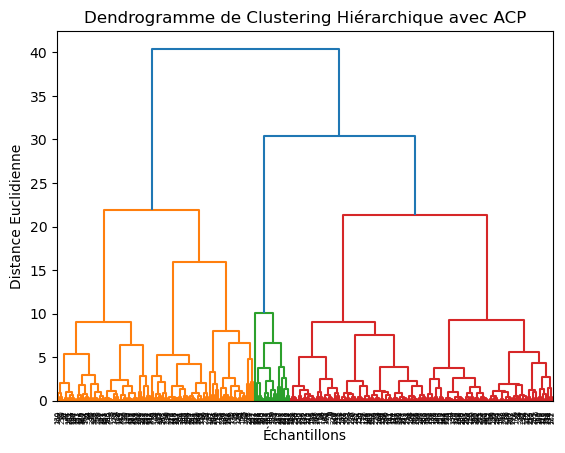

In [36]:
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(x_pca[:,:2])

# Effectuer le clustering hiérarchique
dendrogram = sch.dendrogram(sch.linkage(x_pca[:,:2], method='ward'))

# Afficher le dendrogramme
plt.title("Dendrogramme de Clustering Hiérarchique avec ACP")
plt.xlabel("Échantillons")
plt.ylabel("Distance Euclidienne")
plt.show()


Après avoir appliqué l'analyse en composantes principales ACP avec les deux premières composantes principales, nous avons visualisé comment les données sont regroupées en fonction de la similarité ou de la distance euclidienne entre ces deux composantes. Nous avons observé que le nombre de clusters a diminué par rapport aux données originales. Cette réduction du nombre de clusters indique que le ACP a réduit la dimensionnalité des données en projetant les données dans un espace de dimension réduite, et cela a probablement conduit à la fusion de certains des clusters qui étaient distincts dans les données originales. 

#  DBSCAN 


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


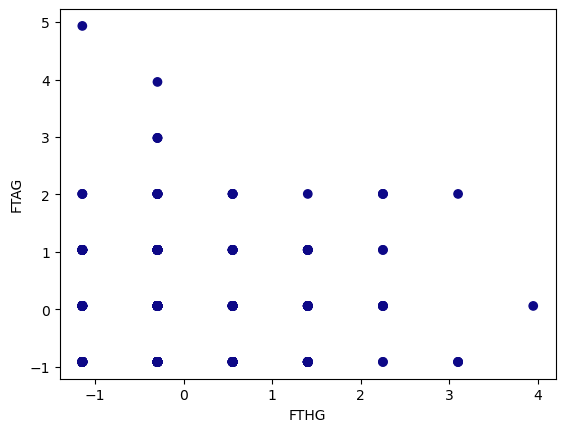

In [37]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# Clusterisation avec DBSCAN
dbscan = DBSCAN(eps=8, min_samples=4).fit(scaled_features)
labels = dbscan.labels_
print(labels)
# Tracé des clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, cmap="plasma")
plt.xlabel("FTHG")
plt.ylabel("FTAG")
plt.show()


En ajustant les valeurs d'epsilon (ε) et du nombre minimum de points (min_samples), on obtient toujours la même configuration de clusters avec DBSCAN, ce qui peut indiquer que nos données ne contiennent pas de structures de clusters significatives que DBSCAN peut identifier ou il est possible que les données soient distribuées de manière aléatoire et il n'y a pas de regroupements clairs.
